# Q9 by MSahil



Using a dataset with ~3,000 images of handwritten Roman numerals (1–10), build a convolutional neural network (ConvNet), then use transfer learning and fine tuning to improve the model, if possible

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
# Image Size
batch_size = 16
img_height = 180
img_width = 180

In [3]:
training_dir = 'data/data/train'
validation_dir = 'data/data/val'

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  training_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2067 files belonging to 10 classes.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  validation_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 813 files belonging to 10 classes.


In [6]:
testing_dir = 'data/data/test'

In [7]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  testing_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 52 files belonging to 10 classes.


In [8]:
train_ds.class_names

['i', 'ii', 'iii', 'iv', 'ix', 'v', 'vi', 'vii', 'viii', 'x']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


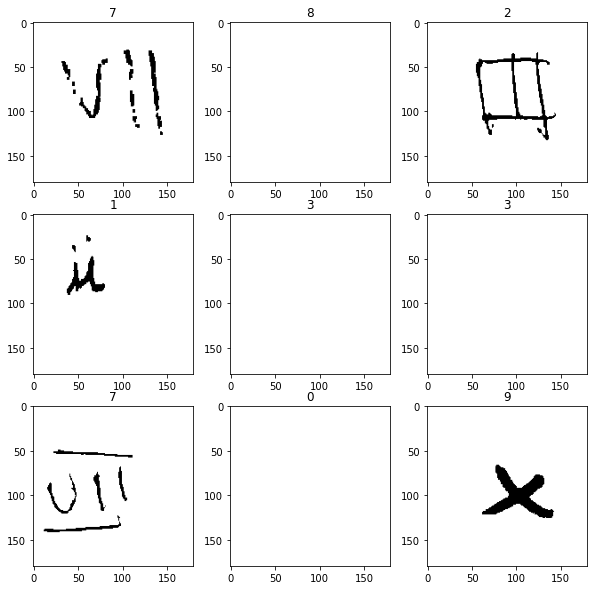

In [9]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))

for i, (image, label) in enumerate(train_ds.take(9)):

    ax = plt.subplot(3, 3, i + 1)

    plt.imshow(image[0])

    plt.title(int(label[0]))

    #plt.axis("off")

In [10]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory.
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img

['b06fe3d8-ce5d-11eb-b317-38f9d35ea60f.png']
Image shape: (220, 272)


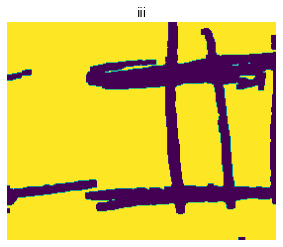

In [11]:
# View a random image from the training dataset
img = view_random_image(target_dir="data/data/train/",
                        target_class="iii")

In [12]:
num_classes = len(train_ds.class_names)
num_classes

10

In [13]:
from tensorflow.keras import layers
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [14]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [15]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Build your Model


In [16]:
model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(24, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(48, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(96, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [17]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [18]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=13
)

Epoch 1/13
130/130 [==============================] - 79s 600ms/step - loss: 2.2786 - accuracy: 0.1771 - val_loss: 2.1597 - val_accuracy: 0.1882
Epoch 2/13
130/130 [==============================] - 69s 533ms/step - loss: 1.6930 - accuracy: 0.3957 - val_loss: 1.6205 - val_accuracy: 0.4379
Epoch 3/13
130/130 [==============================] - 71s 548ms/step - loss: 1.1597 - accuracy: 0.6057 - val_loss: 1.6369 - val_accuracy: 0.4428
Epoch 4/13
130/130 [==============================] - 68s 526ms/step - loss: 0.8114 - accuracy: 0.7184 - val_loss: 1.5461 - val_accuracy: 0.4711
Epoch 5/13
130/130 [==============================] - 71s 546ms/step - loss: 0.4366 - accuracy: 0.8486 - val_loss: 2.5715 - val_accuracy: 0.4059
Epoch 6/13
130/130 [==============================] - 69s 534ms/step - loss: 0.2599 - accuracy: 0.9245 - val_loss: 2.9429 - val_accuracy: 0.4367
Epoch 7/13
130/130 [==============================] - 69s 531ms/step - loss: 0.1251 - accuracy: 0.9603 - val_loss: 3.2039 - val_ac

In [19]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [20]:
IMG_SIZE = (img_height, img_width)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [21]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(16, 6, 6, 1280)


In [22]:
base_model.trainable = False

In [23]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 90, 90, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 90, 90, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 90, 90, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 23, 23, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 23, 23, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 23, 23, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 23, 23, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 12, 12, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 12, 12, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 12, 12, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 12, 12, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 12, 12, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 12, 12, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 12, 12, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 6, 6, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 6, 6, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 6, 6, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 6, 6, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [24]:
#Add a classification head
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(16, 1280)


In [25]:
prediction_layer = tf.keras.layers.Dense(num_classes)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(16, 10)


In [26]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [27]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [28]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

C:\Users\muskan\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 180, 180, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                             

In [30]:
len(model.trainable_variables)

2

In [31]:
#Test the model
loss0, accuracy0 = model.evaluate(val_ds)

51/51 [==============================] - 18s 334ms/step - loss: 2.6770 - accuracy: 0.0984


In [32]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 2.68
initial accuracy: 0.10


In [33]:
initial_epochs = 3
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)

Epoch 1/3
130/130 [==============================] - 69s 500ms/step - loss: 2.5371 - accuracy: 0.1471 - val_loss: 2.1496 - val_accuracy: 0.2202
Epoch 2/3
130/130 [==============================] - 65s 499ms/step - loss: 2.1215 - accuracy: 0.2521 - val_loss: 1.9327 - val_accuracy: 0.3198
Epoch 3/3
130/130 [==============================] - 66s 505ms/step - loss: 1.9287 - accuracy: 0.3188 - val_loss: 1.7943 - val_accuracy: 0.3604


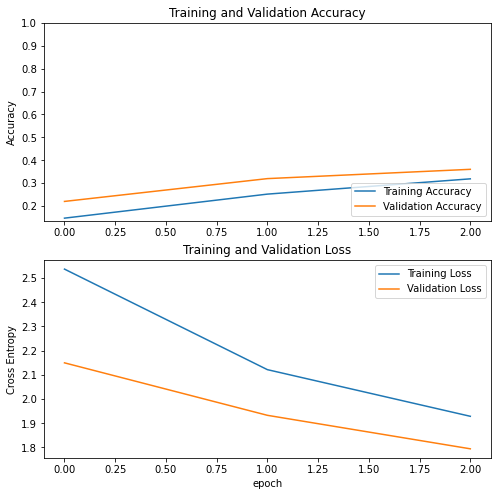

In [34]:
#Learning curves
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [35]:
#Fine tuning
#Un-freeze the top layers of the model
base_model.trainable = True

In [36]:
print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 10

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  154


In [37]:
# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

C:\Users\muskan\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [38]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 180, 180, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                             

In [39]:
# Continue training the model
history.epoch[-1]

2

In [40]:
fine_tune_epochs = 28
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds)

Epoch 3/31
130/130 [==============================] - 187s 1s/step - loss: 1.5808 - accuracy: 0.4678 - val_loss: 1.4063 - val_accuracy: 0.4785
Epoch 4/31
130/130 [==============================] - 170s 1s/step - loss: 1.2796 - accuracy: 0.5597 - val_loss: 1.2989 - val_accuracy: 0.4859
Epoch 5/31
130/130 [==============================] - 187s 1s/step - loss: 1.1376 - accuracy: 0.6178 - val_loss: 1.1590 - val_accuracy: 0.5510
Epoch 6/31
130/130 [==============================] - 177s 1s/step - loss: 1.0134 - accuracy: 0.6657 - val_loss: 1.0856 - val_accuracy: 0.5867
Epoch 7/31
130/130 [==============================] - 194s 1s/step - loss: 0.9349 - accuracy: 0.6865 - val_loss: 0.9621 - val_accuracy: 0.6248
Epoch 8/31
130/130 [==============================] - 237s 2s/step - loss: 0.8655 - accuracy: 0.7247 - val_loss: 0.9688 - val_accuracy: 0.6494
Epoch 9/31
130/130 [==============================] - 309s 2s/step - loss: 0.8222 - accuracy: 0.7276 - val_loss: 0.8268 - val_accuracy: 0.7134

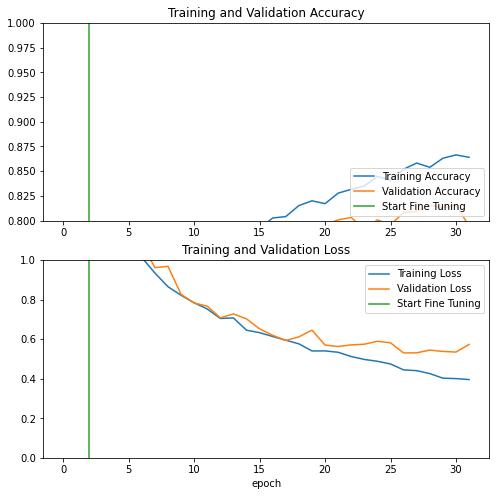

In [41]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()